# Calculations for SpiralArmsPotential.py

Jack Hong  
May 19, 2017

Based on the paper by Cox and Gomez (2002). https://arxiv.org/abs/astro-ph/0207635v1

Some notes:
 * $A$ is the amplitude. $A=4 \pi G \rho_0$
 * $g$ is $\gamma$ from the paper
 * $R$ here refers to $r$ from the paper
 * $r_{ref}$ is $r_0$ from the paper and $\phi_{ref}$ is $\phi_p(r_0)$

In [1]:
import sympy as sym

In [2]:
sym.init_printing(sym.latex)

In [3]:
R, phi, z, t, N, alpha, r_ref, phi_ref, R_s, H, A, omega, C_n, n = \
sym.symbols('R phi z t N alpha r_ref phi_ref R_s H A omega C_n n')

In [4]:
g, K_n, B_n, D_n = sym.symbols('g, K_n, B_n, D_n', cls=sym.Function)

# For now, just note the arguments of the following functions. They will be specified later.
g = g(phi, R, t)
K_n = K_n(R)
B_n = B_n(R)
D_n = D_n(R)

## The Potential

In [5]:
m = sym.var('m') # dummy variable for summation
Phi = A*H*sym.exp(-(R-r_ref)/R_s)*sym.summation((C_n/(K_n*D_n))*(sym.cos(m*g))*(sym.sech(K_n*z/B_n))**B_n,
                                                (m, 1, n))

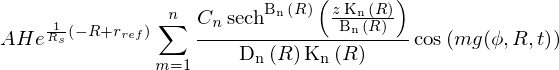

In [6]:
Phi

## Rforce ($\frac{d\Phi}{dR}$)

In [7]:
dPhi_dR = sym.diff(Phi, R)
d2Phi_dR2 = sym.diff(Phi, R, 2)

In [8]:
print(sym.python(dPhi_dR))

A = Symbol('A')
H = Symbol('H')
R = Symbol('R')
r_ref = Symbol('r_ref')
R_s = Symbol('R_s')
m = Symbol('m')
n = Symbol('n')
C_n = Symbol('C_n')
phi = Symbol('phi')
t = Symbol('t')
z = Symbol('z')
g = Function('g')
B_n = Function('B_n')
K_n = Function('K_n')
D_n = Function('D_n')
e = A*H*exp((-R + r_ref)/R_s)*Sum(-C_n*m*sin(m*g(phi, R, t))*sech(z*K_n(R)/B_n(R))**B_n(R)*Derivative(g(phi, R, t), R)/(D_n(R)*K_n(R)) + C_n*(-(z*Derivative(K_n(R), R)/B_n(R) - z*K_n(R)*Derivative(B_n(R), R)/B_n(R)**2)*B_n(R)*tanh(z*K_n(R)/B_n(R)) + log(sech(z*K_n(R)/B_n(R)))*Derivative(B_n(R), R))*cos(m*g(phi, R, t))*sech(z*K_n(R)/B_n(R))**B_n(R)/(D_n(R)*K_n(R)) - C_n*cos(m*g(phi, R, t))*sech(z*K_n(R)/B_n(R))**B_n(R)*Derivative(K_n(R), R)/(D_n(R)*K_n(R)**2) - C_n*cos(m*g(phi, R, t))*sech(z*K_n(R)/B_n(R))**B_n(R)*Derivative(D_n(R), R)/(D_n(R)**2*K_n(R)), (m, 1, n)) - A*H*exp((-R + r_ref)/R_s)*Sum(C_n*cos(m*g(phi, R, t))*sech(z*K_n(R)/B_n(R))**B_n(R)/(D_n(R)*K_n(R)), (m, 1, n))/R_s


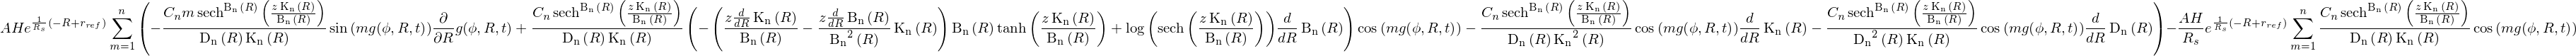

In [9]:
dPhi_dR

In [10]:
dPhi_dz = sym.diff(Phi, z)

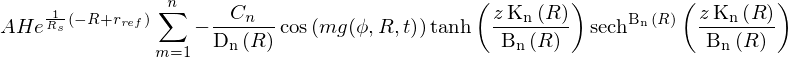

In [11]:
dPhi_dz